In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
fandango = pd.read_csv("fandango_scrape.csv")

In [25]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [26]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [27]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

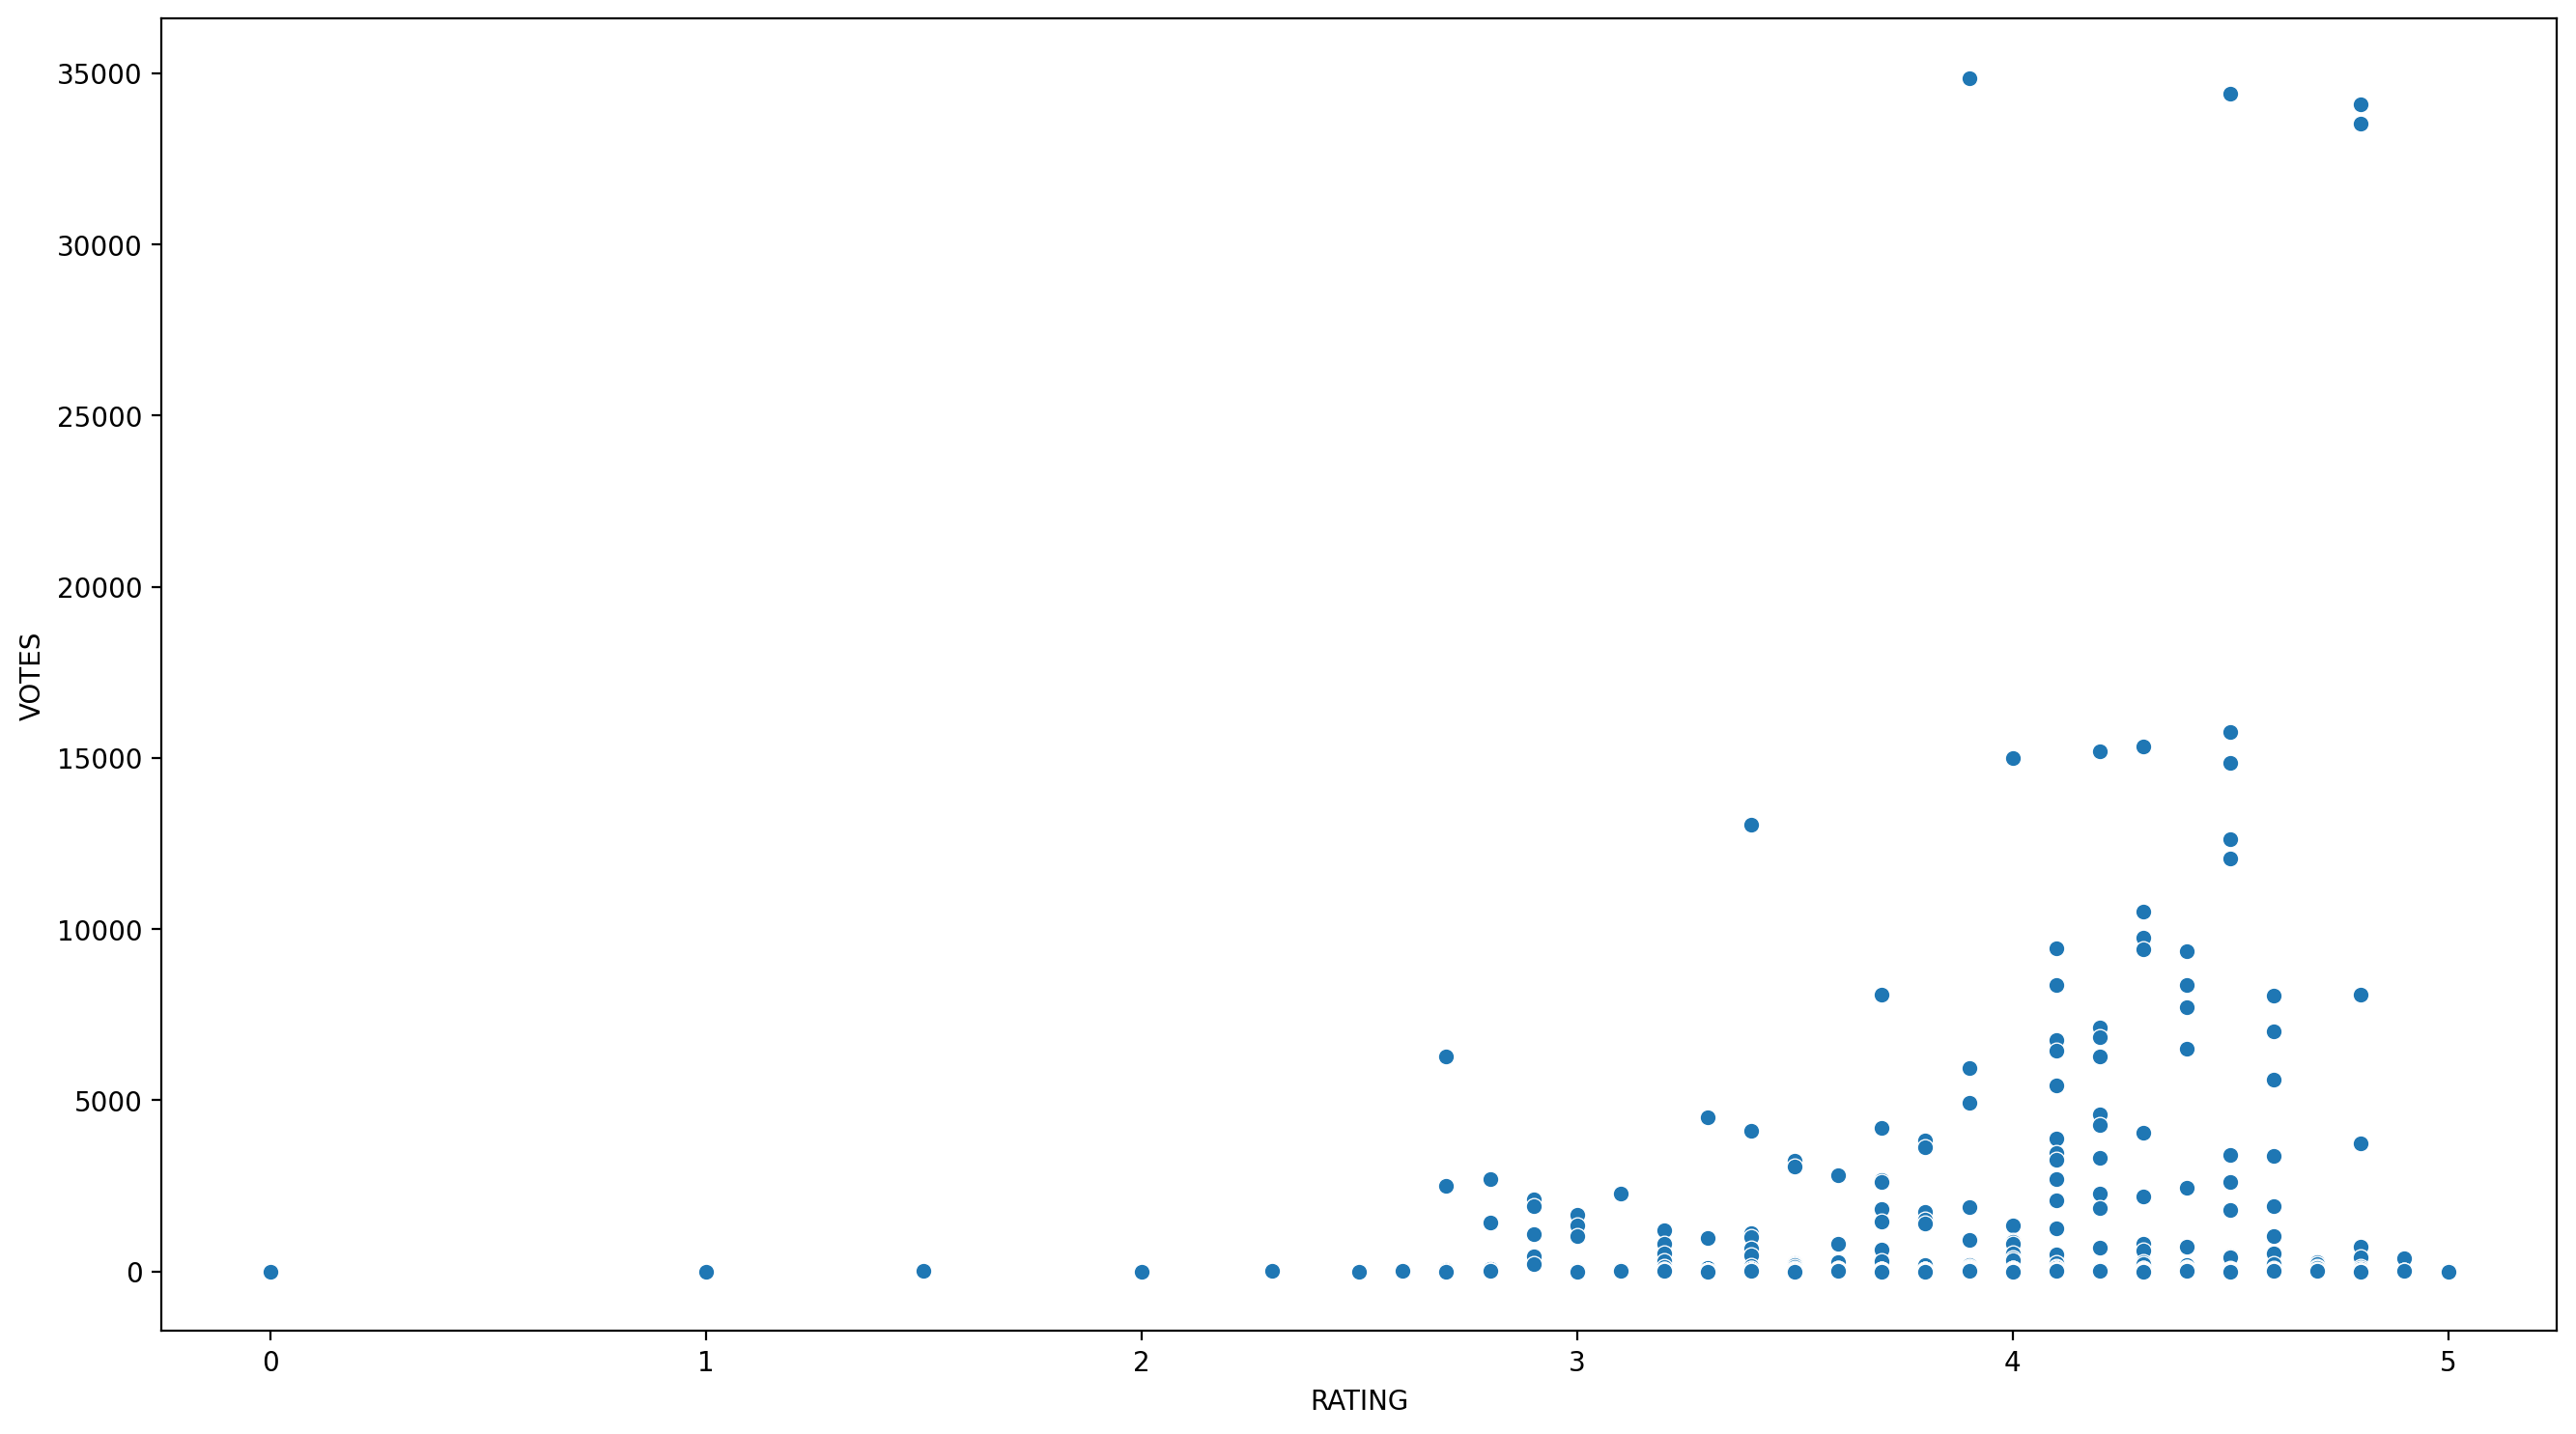

In [28]:
plt.figure(figsize=(16, 9), dpi=200)
sns.scatterplot(data=fandango, x="RATING", y="VOTES")

In [29]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [30]:
def year(data):
    temp = data.split("(")
    return temp[-1][:-1]

In [31]:
fandango["YEAR"] = fandango["FILM"].apply(year)

In [32]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [33]:
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

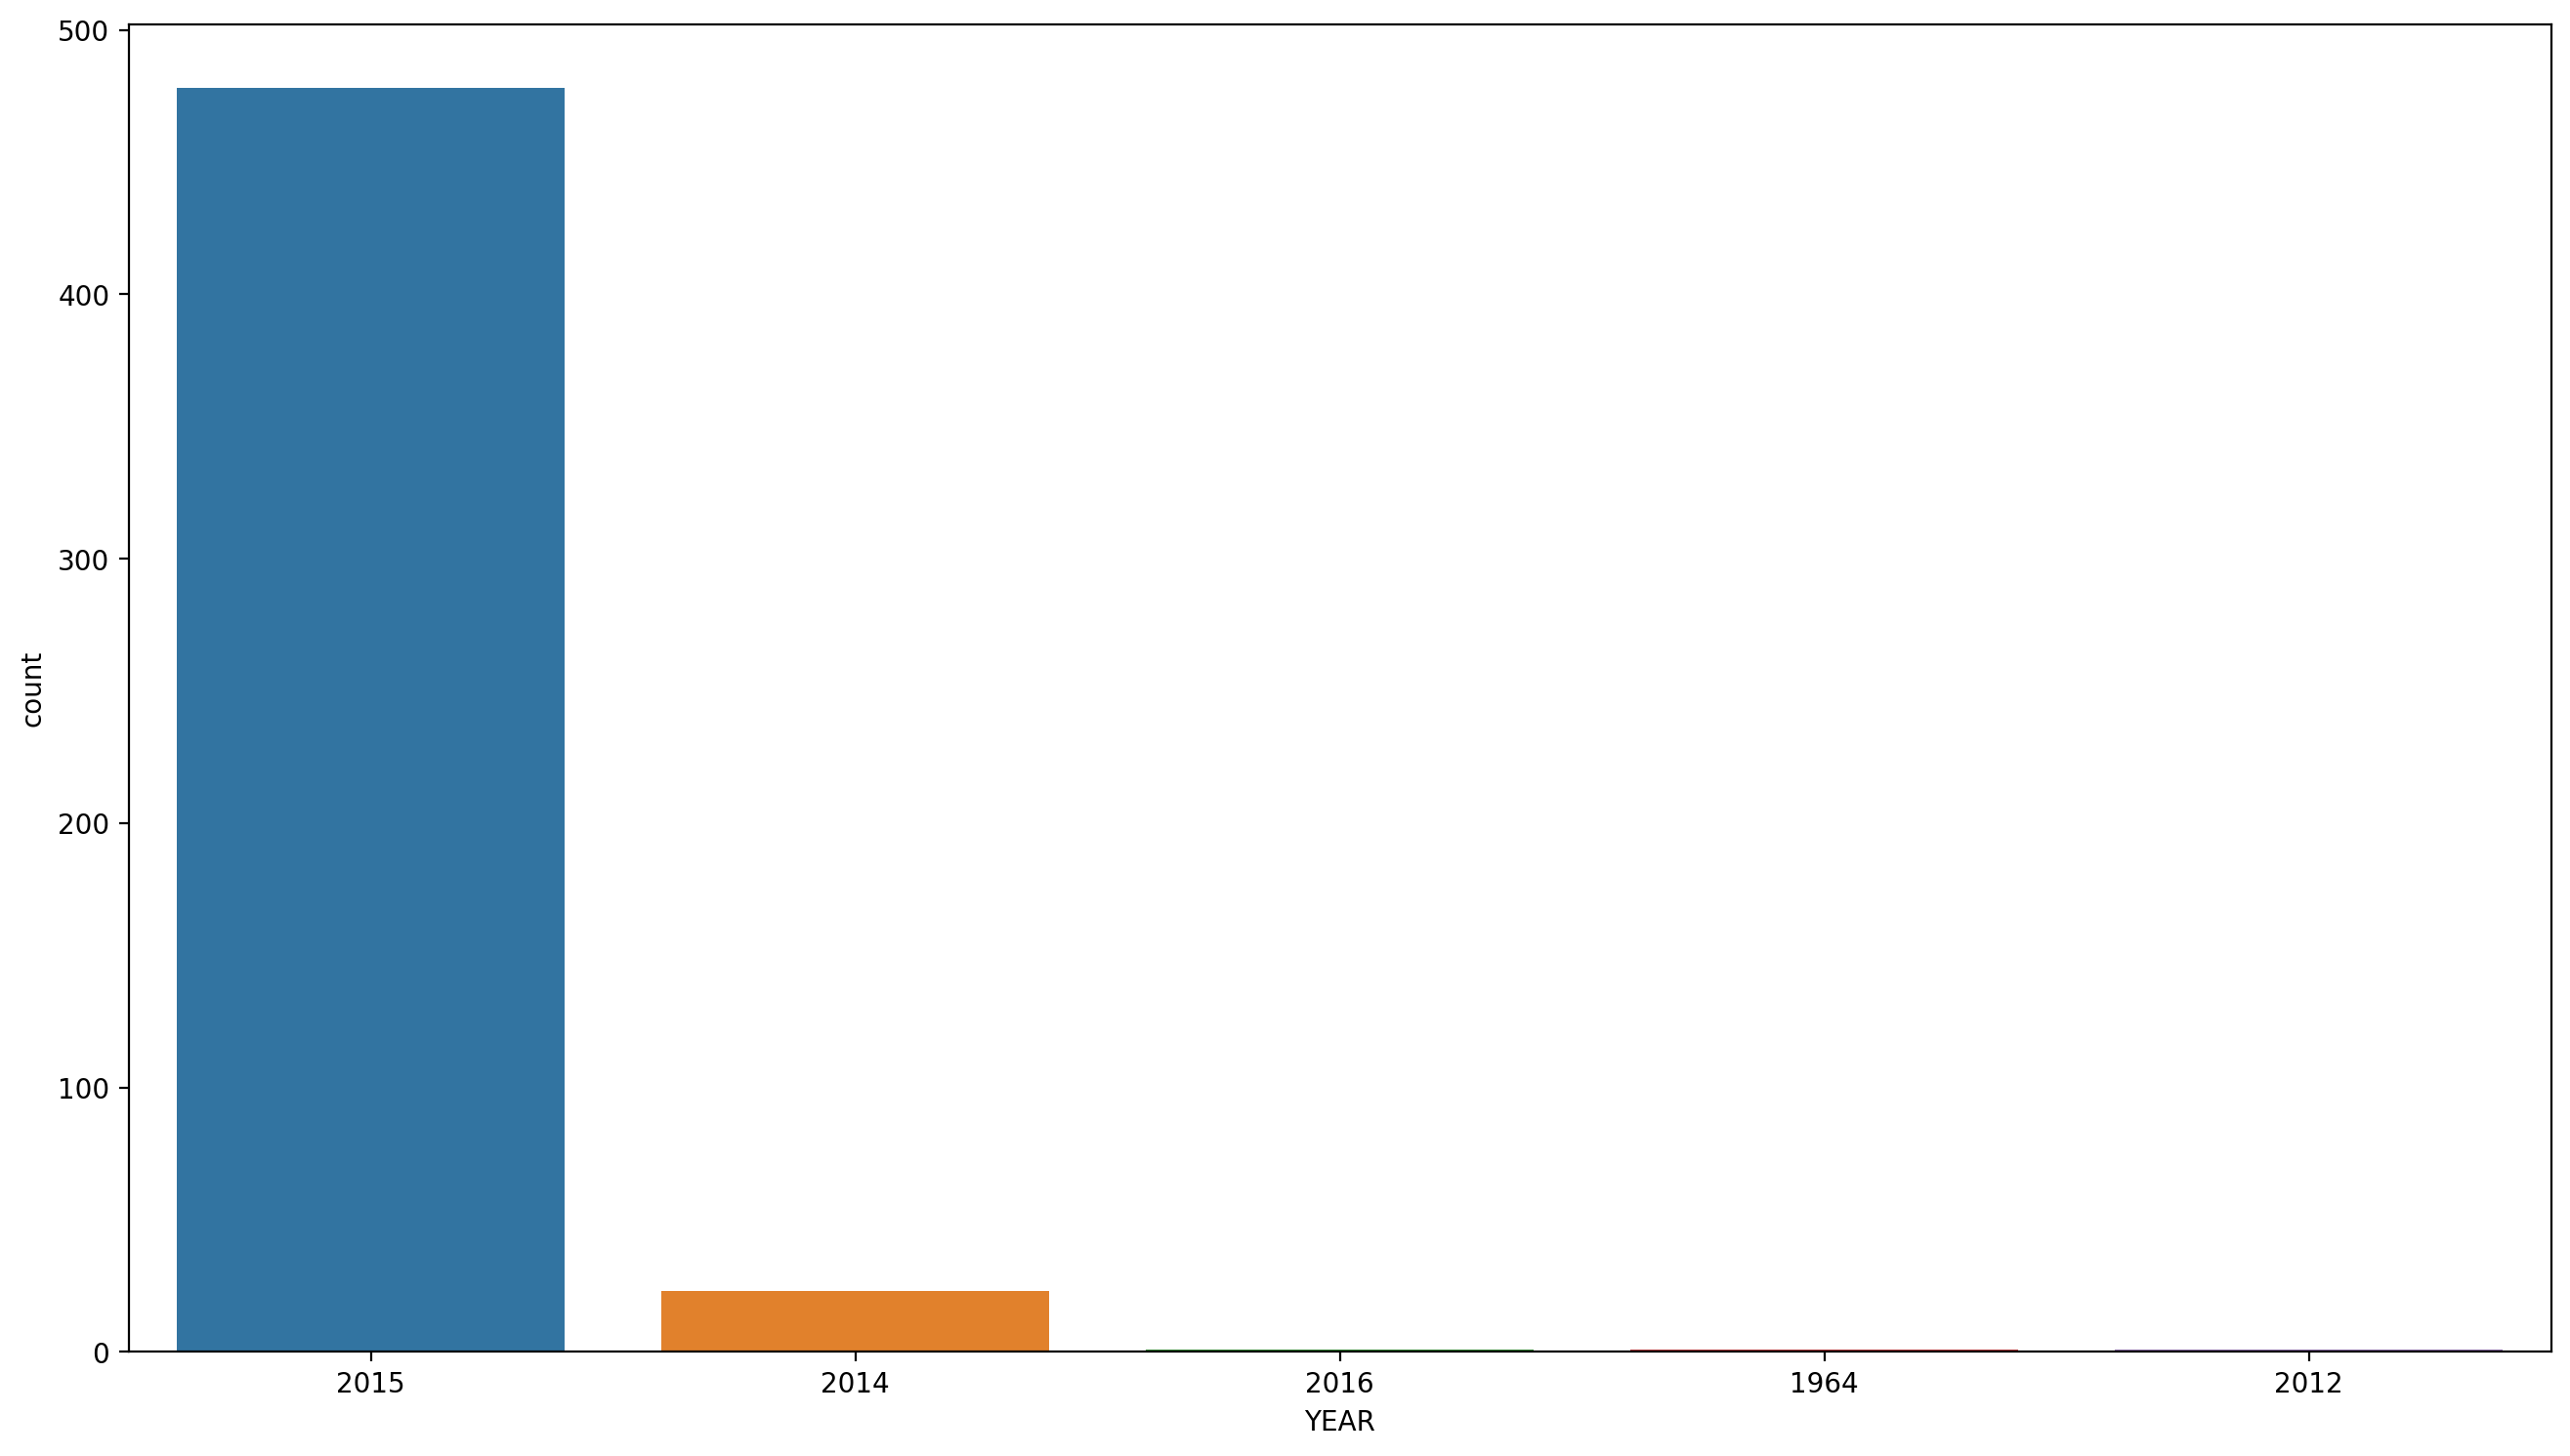

In [34]:
plt.figure(figsize=(16, 9), dpi=200)
sns.countplot(data=fandango, x="YEAR")

In [35]:
fandango.sort_values("VOTES", ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [36]:
fandango.sort_values("VOTES")[:10]

,FILM,STARS,RATING,VOTES,YEAR
503,Zarafa (2012),0.0,0.0,0,2012
465,Le gaucher (2015),0.0,0.0,0,2015
464,La passion d'Augustine (2015),0.0,0.0,0,2015
463,La leon (2015),0.0,0.0,0,2015
462,La face cache de Margo (2015),0.0,0.0,0,2015
461,Journey to Space 3D (2015),0.0,0.0,0,2015
460,Jilebi (2015),0.0,0.0,0,2015
459,Insanity (2015),0.0,0.0,0,2015
458,How to Change the World (2015),0.0,0.0,0,2015
457,Gun & Goal (2015),0.0,0.0,0,2015


In [37]:
len(fandango[fandango["VOTES"] == 0])

69

In [38]:
fandango = fandango[fandango["VOTES"] > 0]

In [39]:
fandango.sort_values("VOTES")[:10]

,FILM,STARS,RATING,VOTES,YEAR
434,Z For Zachariah (2015),5.0,5.0,1,2015
413,Wild Canaries (2015),3.0,3.0,1,2015
412,The Living (2015),3.0,3.0,1,2015
411,The Face of an Angel (2015),3.0,3.0,1,2015
410,"One Cut, One Life (2015)",3.0,3.0,1,2015
409,Nannbenda (2015),3.0,3.0,1,2015
408,Hungry Hearts (2015),3.0,3.0,1,2015
414,Buggs Bunny (2015),4.0,4.0,1,2015
407,Empire of Lust (2015),3.0,3.0,1,2015
405,Amour Fou (2015),3.0,3.0,1,2015


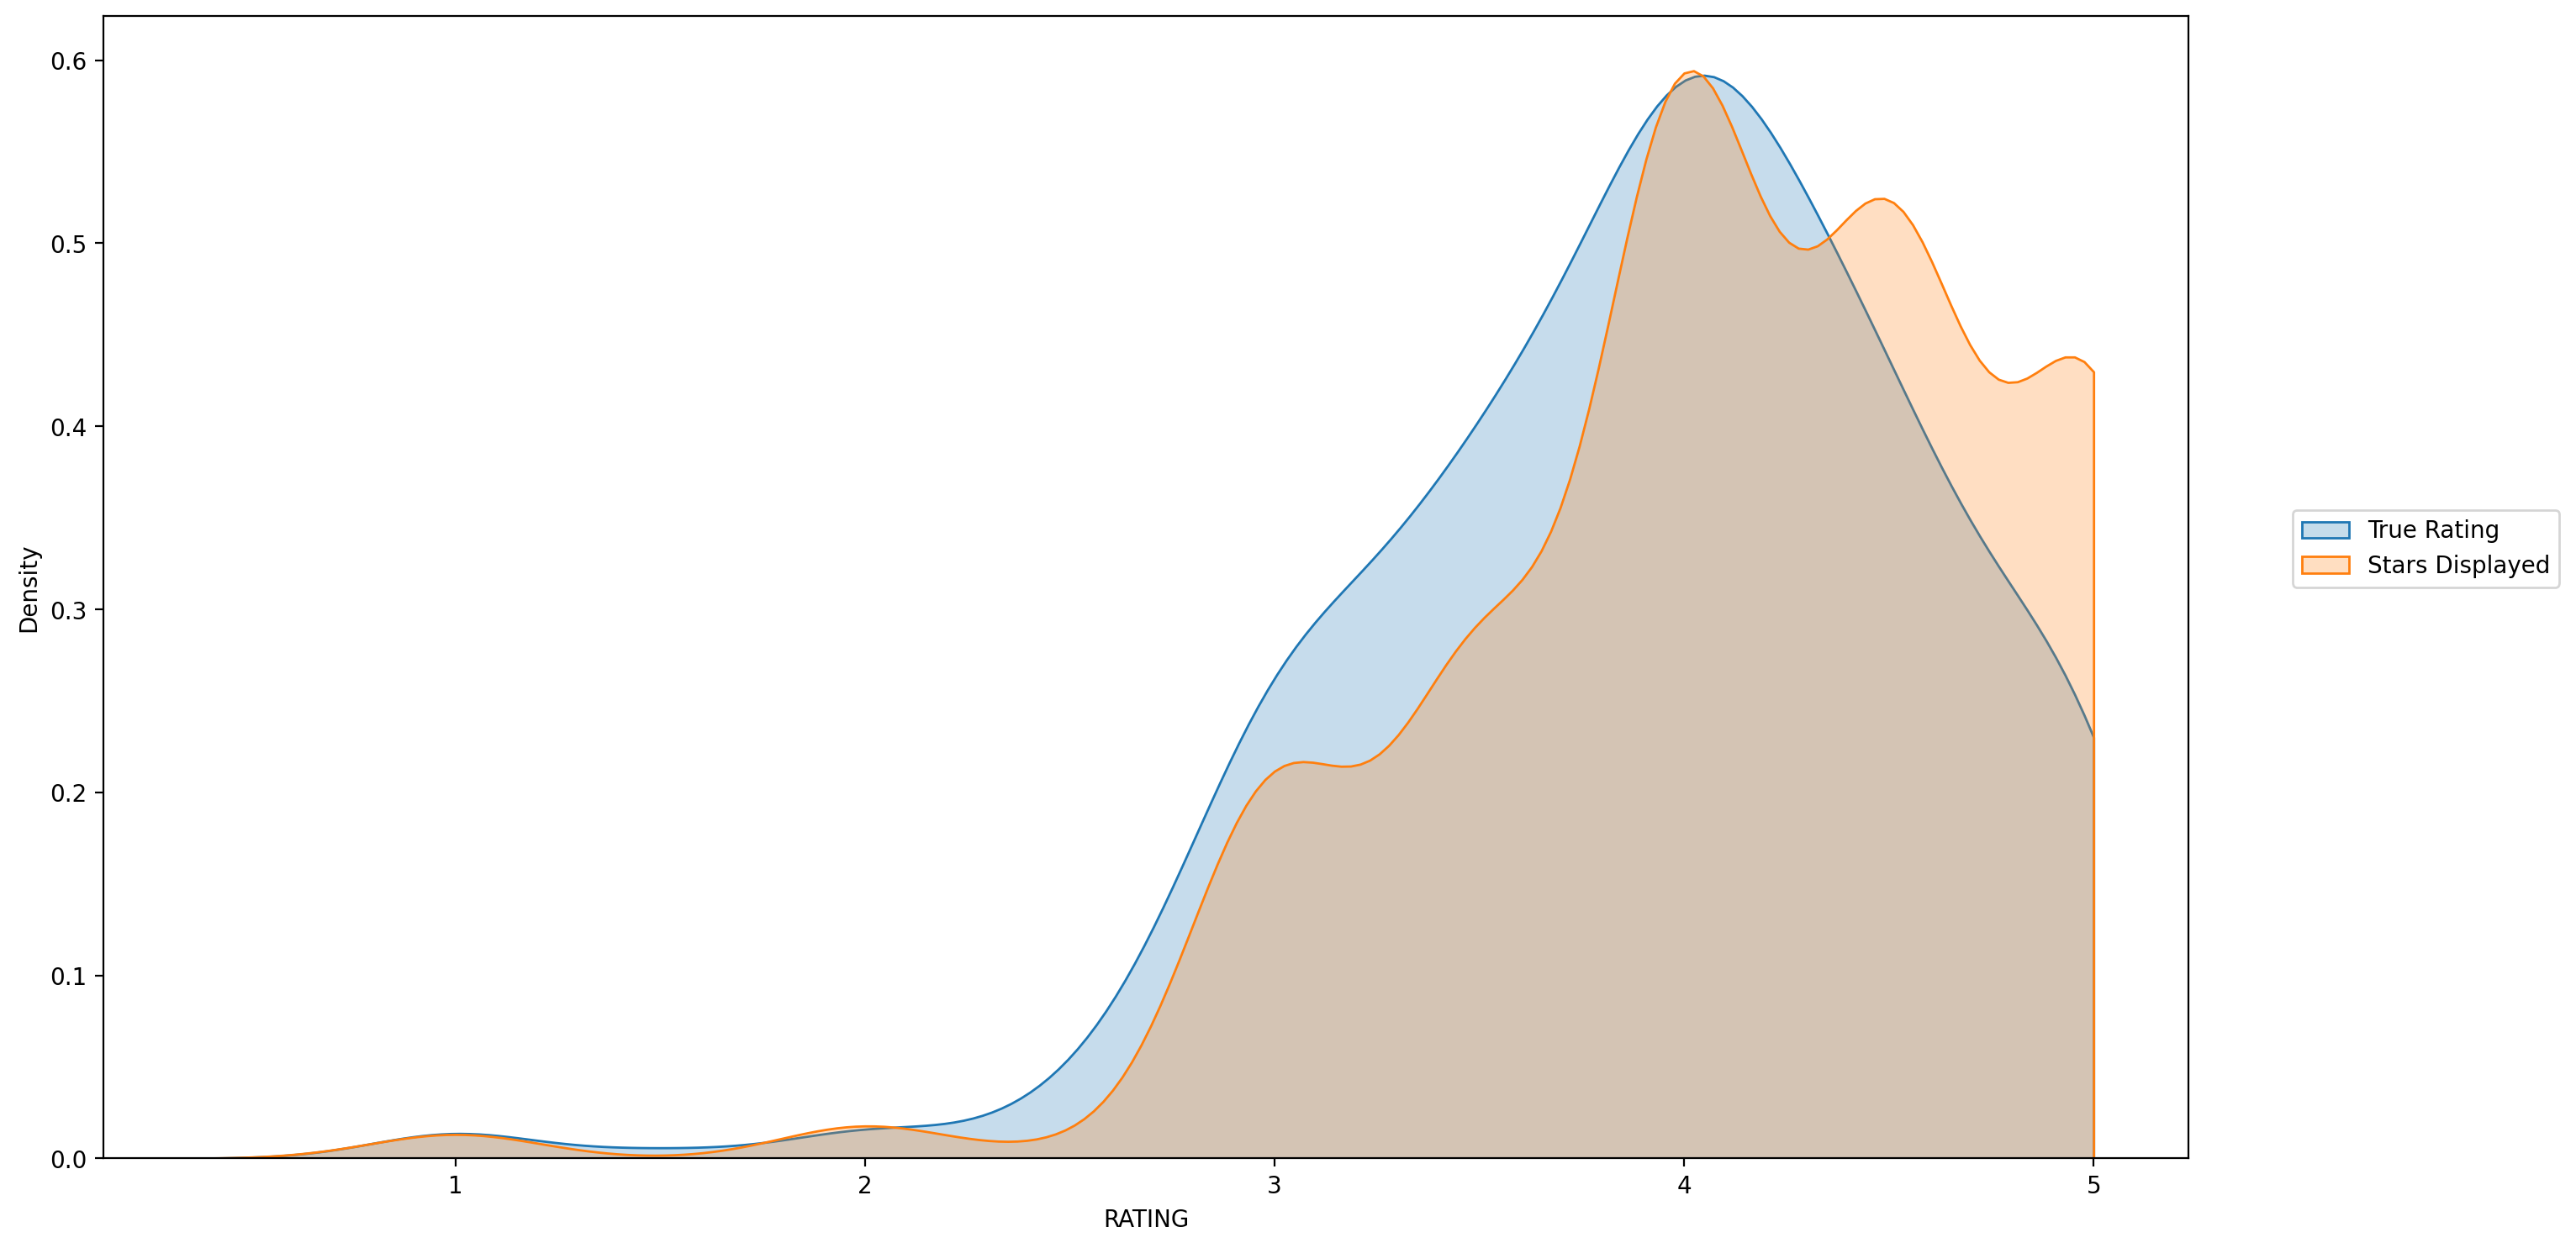

In [41]:
plt.figure(figsize=(16, 9), dpi=200)
sns.kdeplot(data=fandango, x="RATING", clip=[0, 5], fill=True, label="True Rating")
sns.kdeplot(data=fandango, x="STARS", clip=[0, 5], fill=True, label="Stars Displayed")

plt.legend(loc=(1.05, 0.5))

In [42]:
fandango["STARS_DIFF"] = (fandango["STARS"] - fandango["RATING"]).round(2)

In [43]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


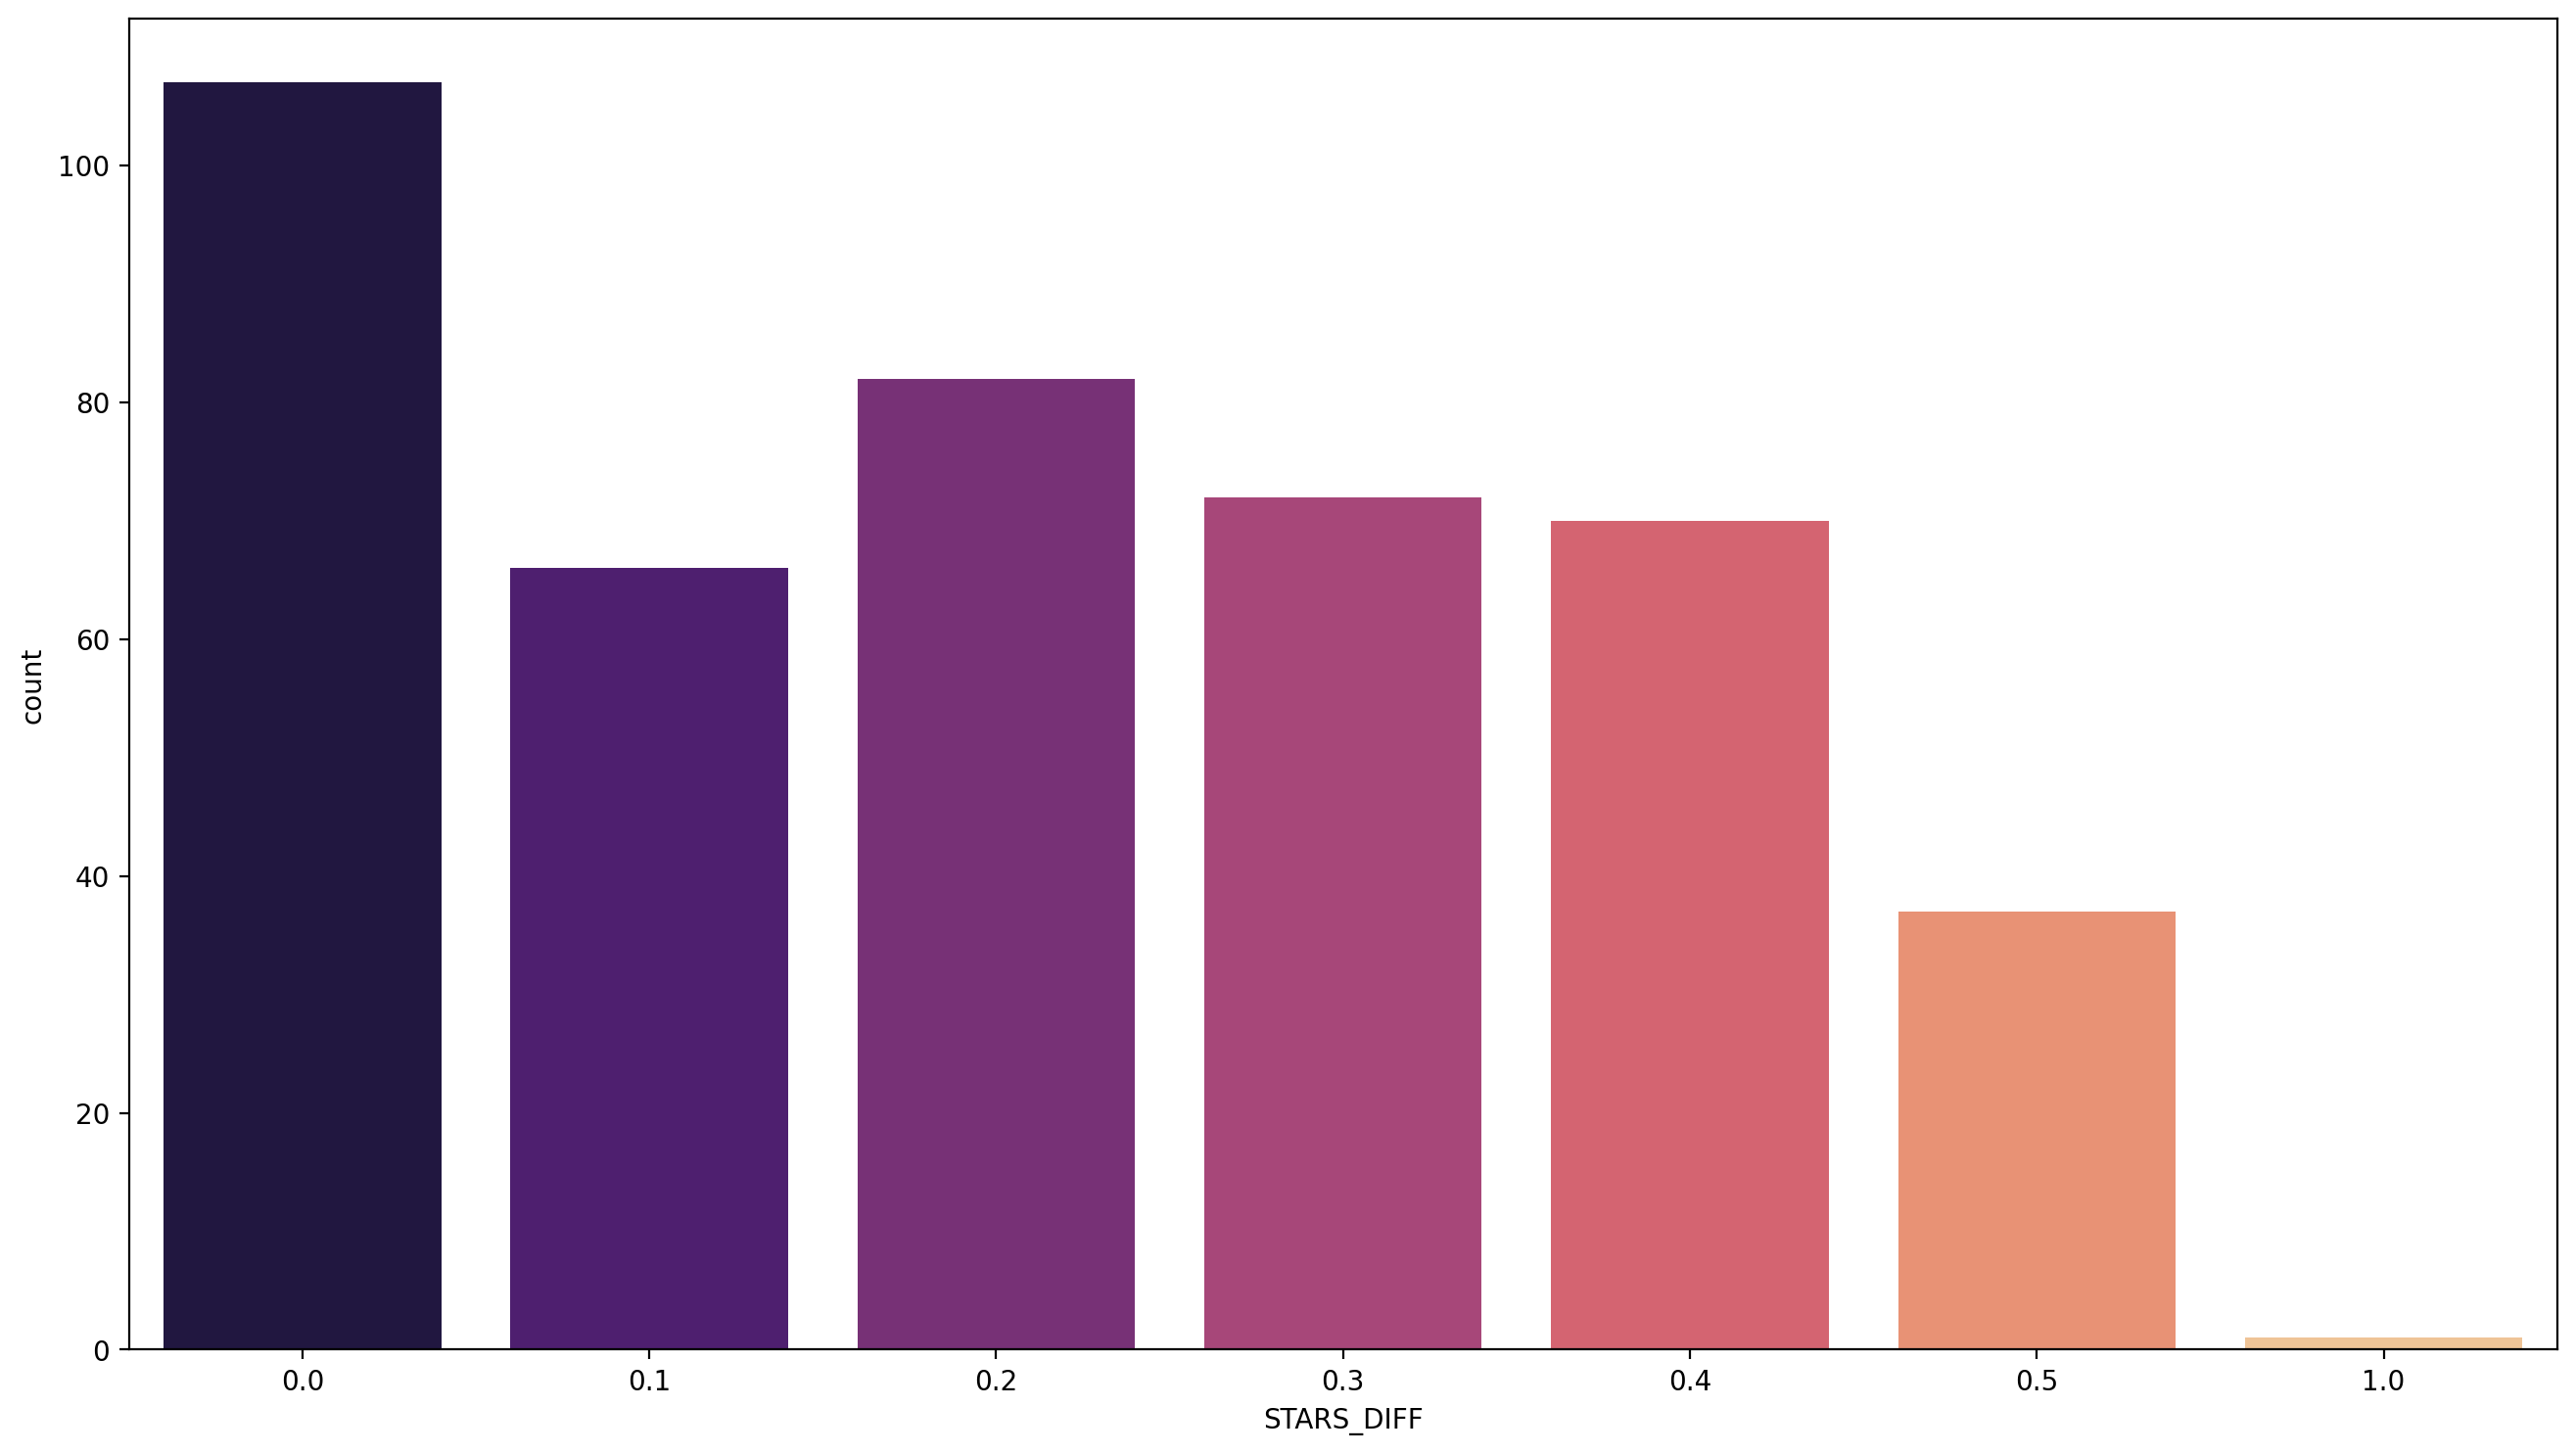

In [47]:
plt.figure(figsize=(16, 9), dpi=200)
sns.countplot(data=fandango, x="STARS_DIFF", palette="magma");

In [48]:
fandango[fandango["STARS_DIFF"] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [49]:
others = pd.read_csv("all_sites_scores.csv")

In [50]:
others.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [51]:
others.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [53]:
others.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

(0.0, 100.0)

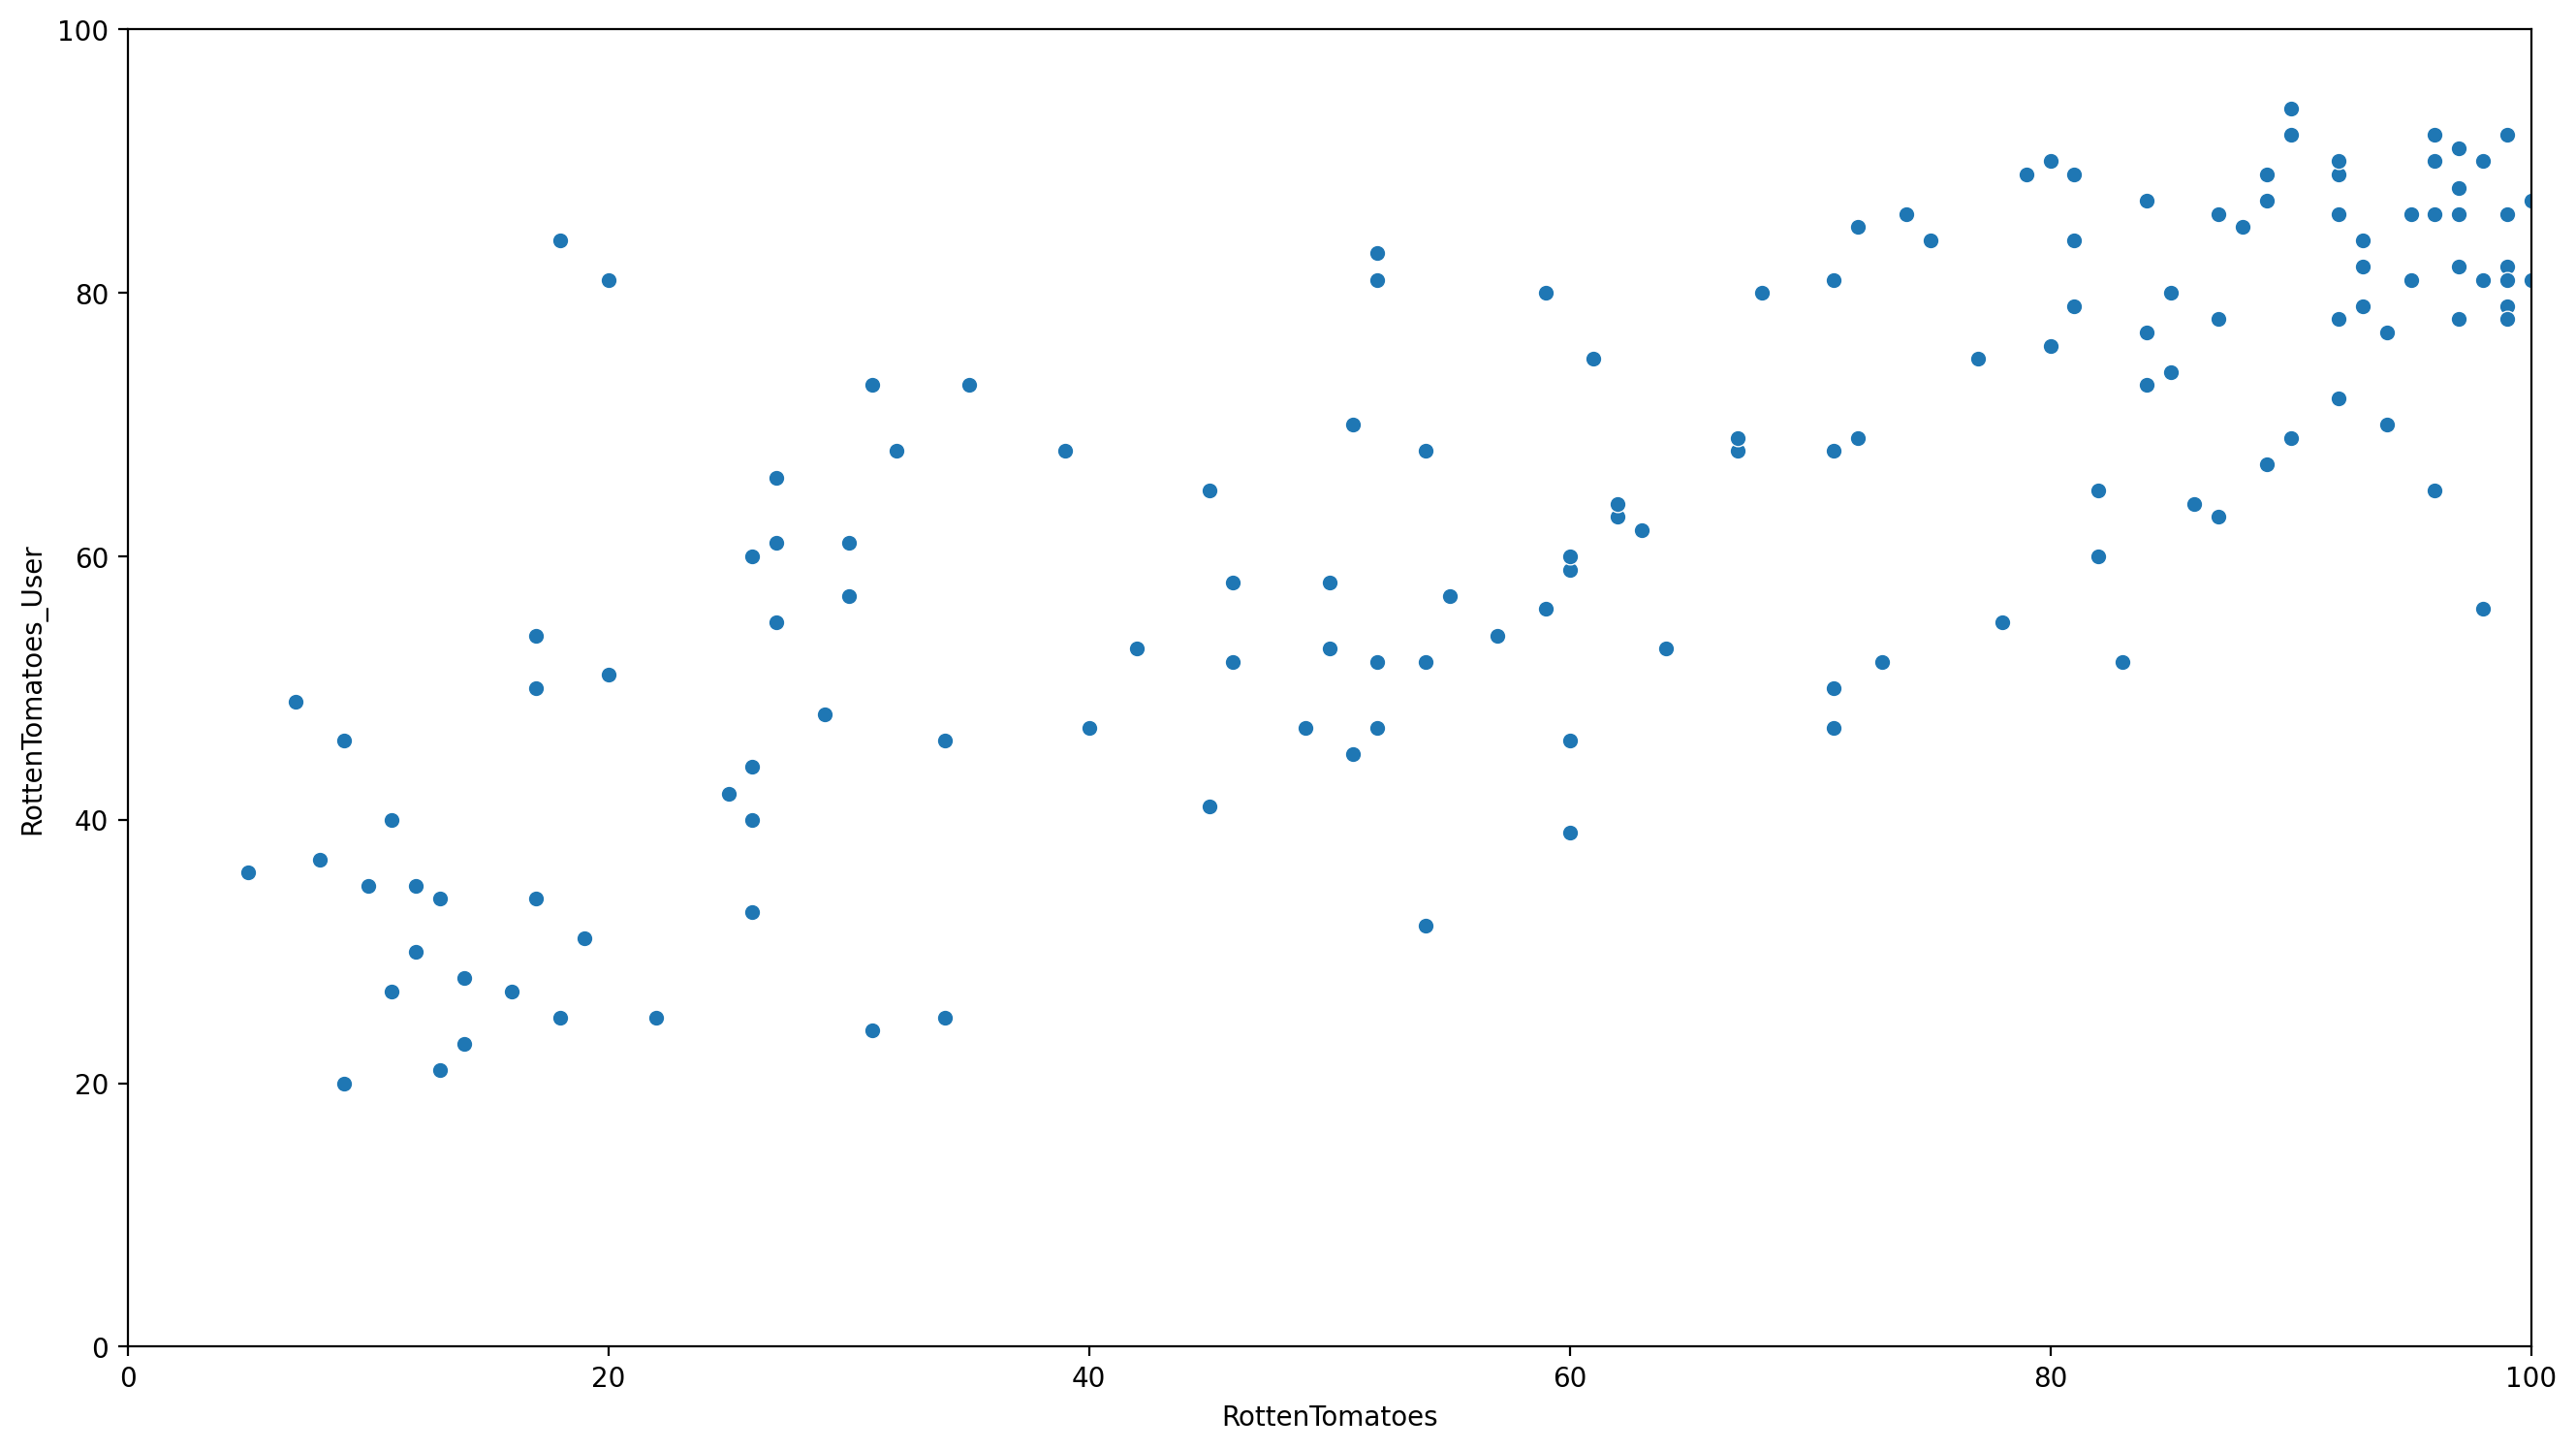

In [55]:
plt.figure(figsize=(16, 9), dpi=200)
sns.scatterplot(data=others, x="RottenTomatoes", y="RottenTomatoes_User")
plt.xlim(0, 100)
plt.ylim(0, 100)

In [56]:
others["RT_Diff"] = others["RottenTomatoes"] - others["RottenTomatoes_User"]

In [57]:
others.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [58]:
others["RT_Diff"].abs().mean()

15.095890410958905

Text(0.5, 1.0, 'Rotten Tomatoes difference')

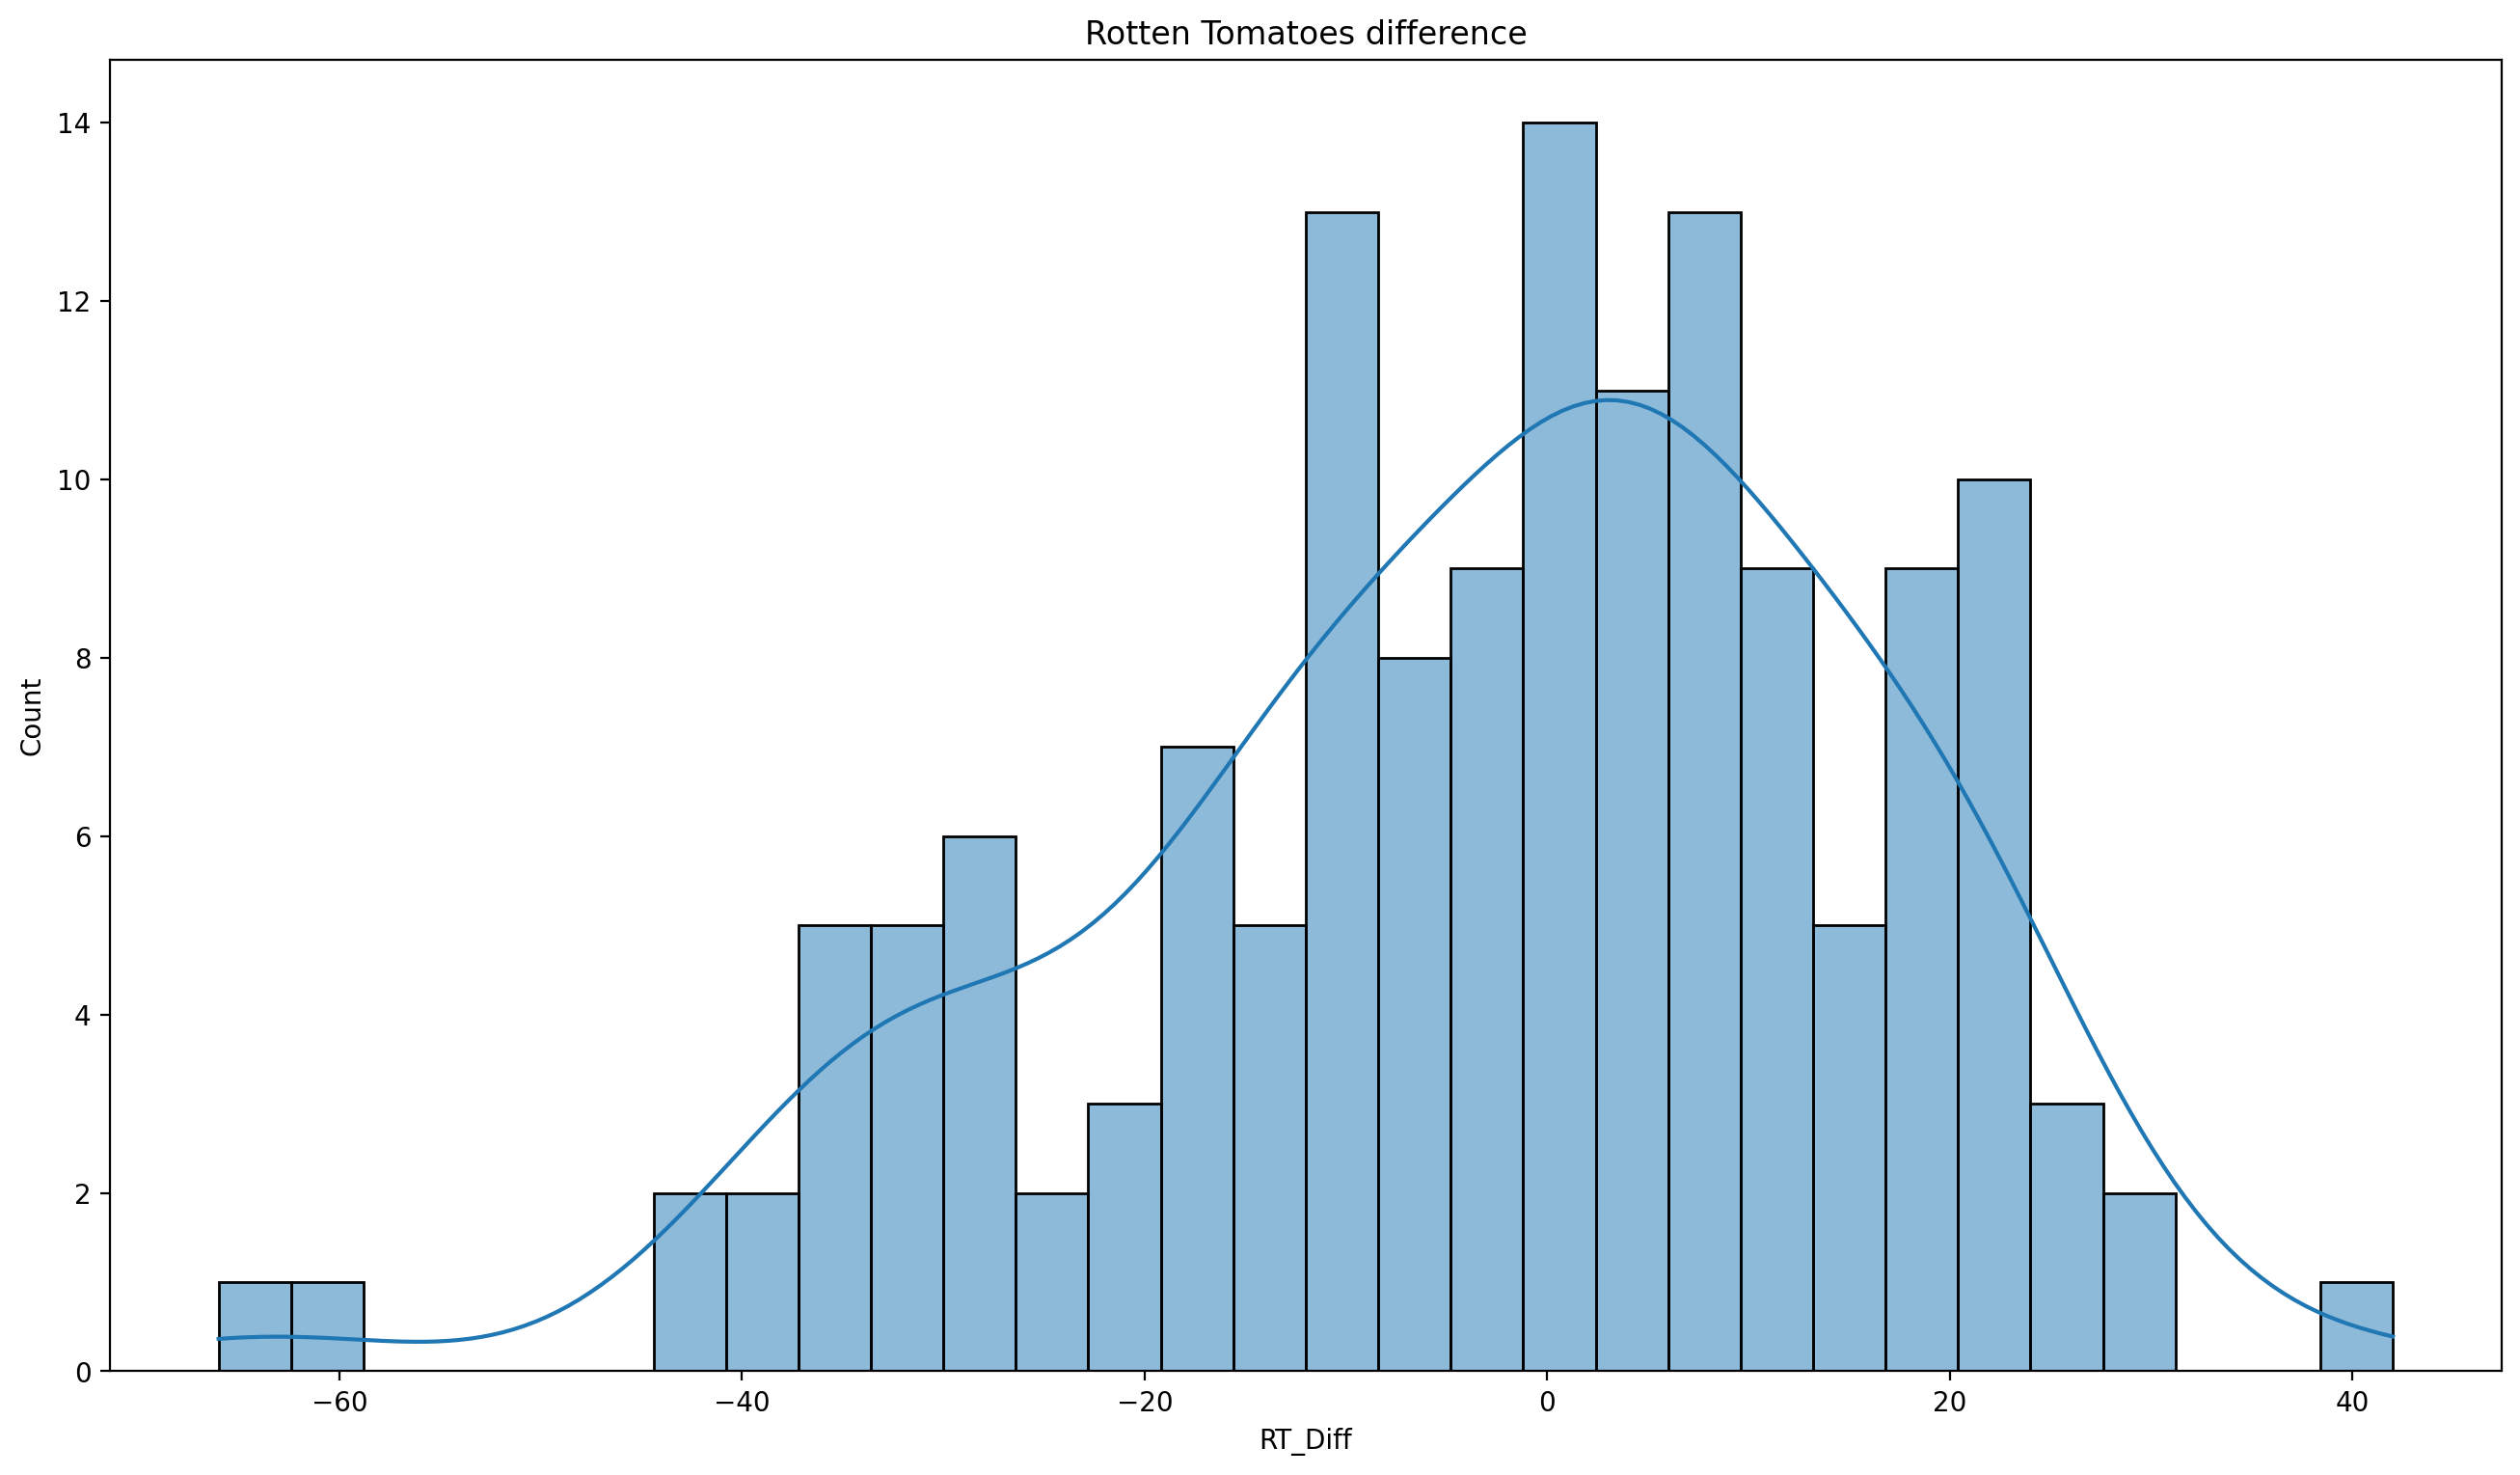

In [62]:
plt.figure(figsize=(16, 9), dpi=200)
sns.histplot(data=others, x="RT_Diff", kde=True, bins=30)
plt.title("Rotten Tomatoes difference")

Text(0.5, 1.0, 'Rotten Tomatoes absolute difference')

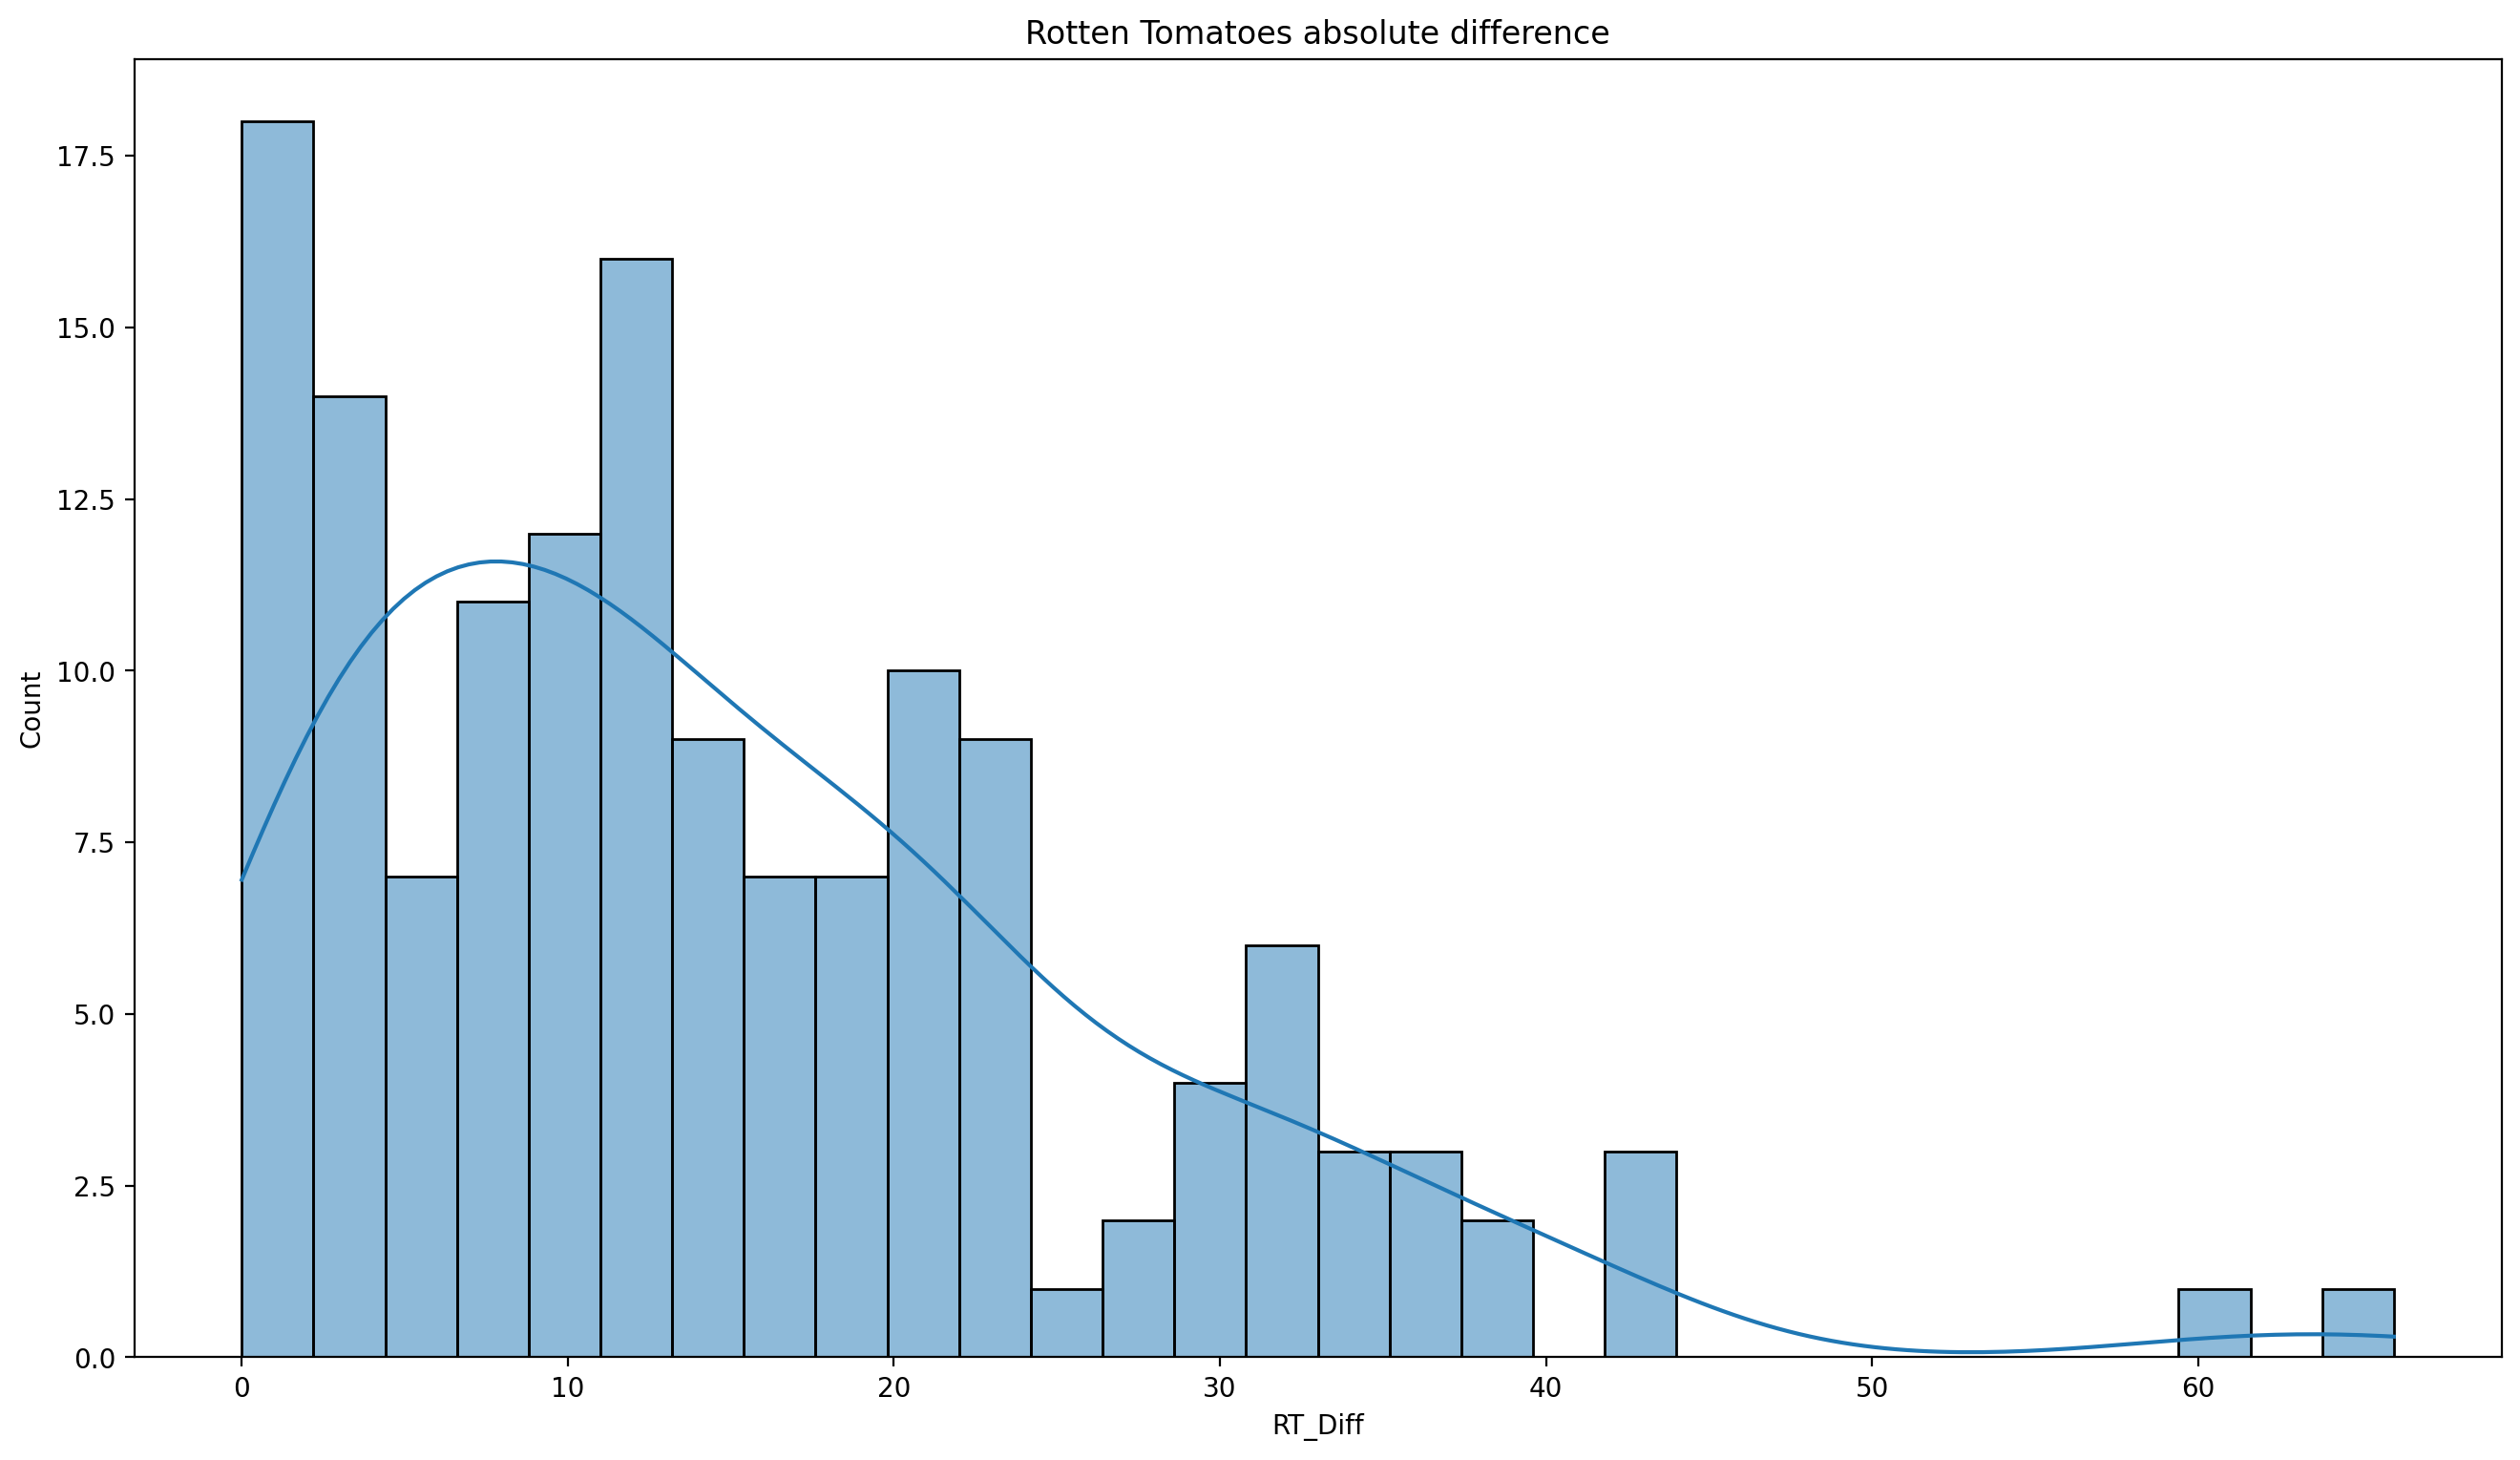

In [63]:
plt.figure(figsize=(16, 9), dpi=200)
sns.histplot(x=others["RT_Diff"].abs(), bins=30, kde=True)
plt.title("Rotten Tomatoes absolute difference")

### MetaCritic

(0.0, 10.0)

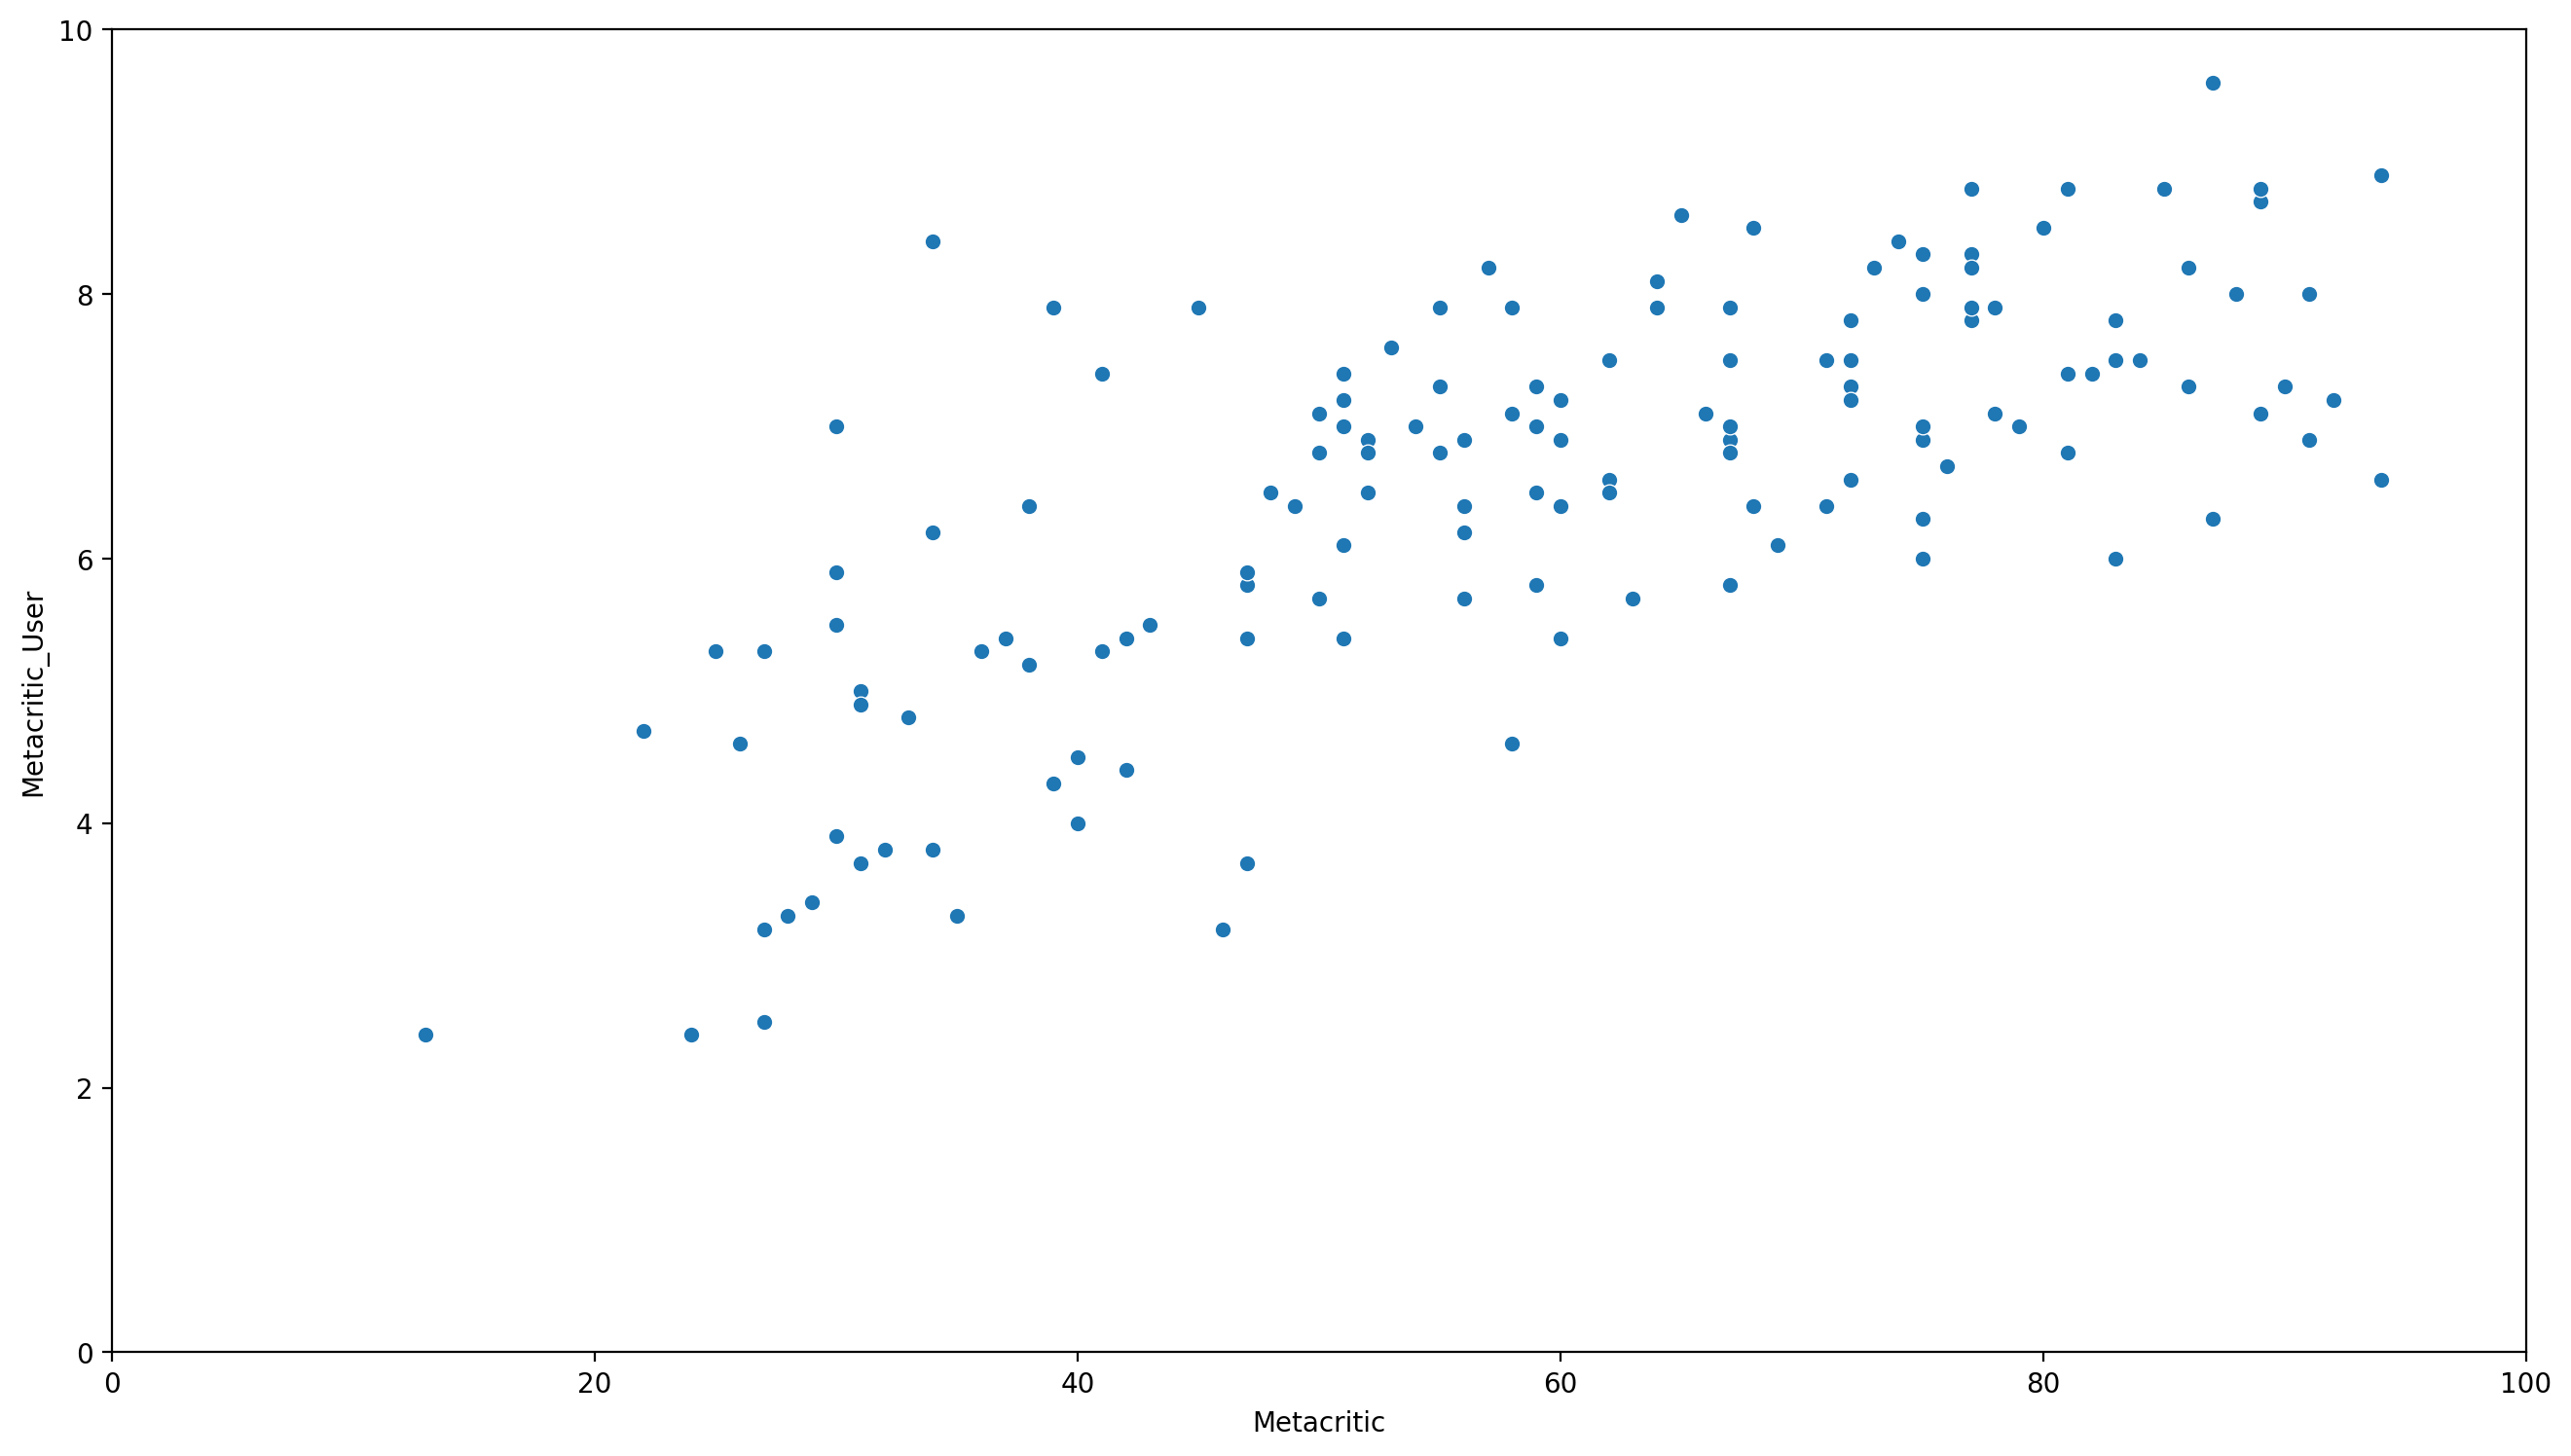

In [65]:
plt.figure(figsize=(16, 9), dpi=200)
sns.scatterplot(data=others, x="Metacritic", y="Metacritic_User")
plt.xlim(0, 100)
plt.ylim(0, 10)

### iMDB

In [ ]:
plt.figure(figsize=(16, 9), dpi=200)
